In [13]:
# 1. Obtención de datos. ¿Puedes llevar a cabo el proyecto con estos datos?
# 2. Define tu hipótesis. ¿Qué piensas que puedes obtener de estos datos? ¿Qué vas a poder resolver? ¿Cómo lo vas a llevar a cabo? (**Fecha límite Viernes 4**)
# 3. Preprocesado: obtén todos los datos de las diferentes fuentes que hayas utilizado, juntalos y ponlos en un formato entendible.
# 4. Limpia los datos: transformaciones, duplicados, missings, columnas inútiles...
# 5. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.
# 6. Concluye con tu análisis si estabas o no en lo cierto acerca de tu planteamiento y tu hipótesis.
# 7. (Bonus track). Crea un dashboard para representar tu análisis exploratorio.
# 8. Documenta tu proyecto y súbelo a GitHub.

# gasto hospital, numero hospitales, ranking, densidad población, bajas laborales.

In [14]:
#1. El proyecto se puede llevar a cabo con los datos obtenidos. Los datos obtenidos son de extensión nacional donde aporta información de altas y bajas.
#2. Es posible que los datos obtenidos planteen la situación actual de salud naiconal. Teniendo en cuenta todas las variables disponibles.
    # Es posible identificar por rangos de edad, sexo y enfermedad. De esta manera, podremos identificar cuáles son las causantes de ingresos en los hospitales .
    # Los datos son de 2021


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
pd.set_option("display.max_colwidth",None) # 50 is the default

In [17]:
df1 = pd.read_csv("Data/Estancia_comunidades.csv", sep = "\t") # Leo el SCV 

In [18]:
df1

,Sexo,Diagnóstico principal (CIE10MC),Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Total
0,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,NaN,NaN,39.584.782
1,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,NaN,4.761.302
2,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Almería,375.821
3,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Cádiz,736.773
4,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Córdoba,426.425
...,...,...,...,...,...,...
28603,Mujeres,ALTAS SIN DIAGNÓSTICO,TOTAL NACIONAL,PAÍS VASCO,Gipuzkoa,..
28604,Mujeres,ALTAS SIN DIAGNÓSTICO,TOTAL NACIONAL,"RIOJA, LA",NaN,49
28605,Mujeres,ALTAS SIN DIAGNÓSTICO,TOTAL NACIONAL,Ceuta,NaN,4
28606,Mujeres,ALTAS SIN DIAGNÓSTICO,TOTAL NACIONAL,Melilla,NaN,47


In [19]:
df1.info() # Información general del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28608 entries, 0 to 28607
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo                              28608 non-null  object
 1   Diagnóstico principal (CIE10MC)   28608 non-null  object
 2   Total Nacional                    28608 non-null  object
 3   Comunidades y Ciudades Autónomas  27714 non-null  object
 4   Provincias                        19221 non-null  object
 5   Total                             28608 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [20]:
df1.head(10) # 10 primeras posiciones del DataFrame

,Sexo,Diagnóstico principal (CIE10MC),Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Total
0,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,NaN,NaN,39.584.782
1,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,NaN,4.761.302
2,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Almería,375.821
3,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Cádiz,736.773
4,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Córdoba,426.425
5,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Granada,550.809
6,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Huelva,301.444
7,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Jaén,358.860
8,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Málaga,969.035
9,Ambos sexos,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V, W, X, Y)",TOTAL NACIONAL,ANDALUCÍA,Sevilla,1.042.134


# Web Scraping

In [21]:
!pip install pandas

In [22]:
!pip install numpy

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np

In [2]:
url = "https://www.sanidad.gob.es/estadEstudios/sanidadDatos/tablas/tabla22.htm"
response = requests.get(url)

In [3]:
print(response) # Para saber si se ha guardado correctamente

<Response [200]>


In [4]:
# Necesito el contenido HTML de la página web solicitada, así que como siguiente paso guardamos el contenido de la respuesta a html:

html = response.content

In [5]:
soup = bs(html, "lxml")

In [6]:
tabla_values = soup.select("table td") # Seleccion de elementos de la tabla

In [7]:
tabla_comunidades = soup.select("table th")[8:]

In [8]:
clean_tabla_comunidades = []
for i in tabla_comunidades:
       clean_tabla_comunidades.append(i.get_text())

In [9]:
clean_tabla_comunidades

['Andalucía',
 'Aragón',
 'Asturias, Principado',
 'Balears, Illes',
 'Canarias',
 'Cantabria',
 'Castilla y León',
 'Castilla-La Mancha',
 'Cataluña',
 'Comunitat Valenciana',
 'Extremadura',
 'Galicia',
 'Madrid, Comunidad de',
 'Murcia, Región de',
 'Navarra, C. Foral de',
 'País Vasco',
 'Rioja, La',
 'Ceuta y Melilla']

In [10]:
hospitales_numero = []
hospitales_camas = []
hospitales_camas_habitantes = []

In [11]:
for i in range(0, 108, 6):  # Elemento 0 de la lista, 114 es el tamaño de la tabla y 6 son los saltos del bucle (cada 6)
    hospitales_numero.append(int(tabla_values[6 + i].get_text())) # Selecciono elemento 0 de la tabla
    hospitales_camas.append(float(tabla_values[7 + i].get_text()))
    hospitales_camas_habitantes.append(float(tabla_values[9 + i].get_text().replace(",",".")))

In [12]:
hospitales_numero

[50, 20, 12, 11, 12, 5, 16, 20, 157, 39, 12, 19, 37, 16, 6, 26, 6, 2]

In [13]:
hospitales_camas

[14.407,
 4.091,
 3.053,
 2.251,
 4.326,
 1.502,
 6.649,
 4.497,
 26.199,
 10.43,
 3.508,
 7.653,
 12.578,
 3.503,
 1.595,
 6.042,
 991.0,
 341.0]

In [14]:
hospitales_camas_habitantes

[1.7,
 3.4,
 3.2,
 2.2,
 2.1,
 2.7,
 3.1,
 2.5,
 3.7,
 2.3,
 3.5,
 3.2,
 2.1,
 2.5,
 2.7,
 3.1,
 3.2,
 2.5]

In [15]:
dic_1 = {"Comunidades autónomas": clean_tabla_comunidades, "Cantidad hospitales" : hospitales_numero, "Cantidad camas" : hospitales_camas, "Camas por habitantes" : hospitales_camas_habitantes}

In [16]:
df = pd.DataFrame(dic_1)

In [17]:
df

,Comunidades autónomas,Cantidad hospitales,Cantidad camas,Camas por habitantes
0,Andalucía,50,14.407,1.7
1,Aragón,20,4.091,3.4
2,"Asturias, Principado",12,3.053,3.2
3,"Balears, Illes",11,2.251,2.2
4,Canarias,12,4.326,2.1
5,Cantabria,5,1.502,2.7
6,Castilla y León,16,6.649,3.1
7,Castilla-La Mancha,20,4.497,2.5
8,Cataluña,157,26.199,3.7
9,Comunitat Valenciana,39,10.430,2.3


In [18]:
df.to_csv("Data/data_camas.csv",index=False) # Guardo DataFrame en un archivo CSV

In [19]:
df2 = pd.read_csv("Data/Densidad_poblacion.csv", sep = "\t", encoding="latin-1")

In [20]:
df2

,"Comunidades y Ciudades AutÃ³nomas,TamaÃ±o de los municipios,Periodo,Total"
0,"01 AndalucÃ­a,Total,2021,8472407"
1,"09 CataluÃ±a,Total,2021,7763362"
2,"13 Madrid, Comunidad de,Total,2021,6751251"
3,"10 Comunitat Valenciana,Total,2021,5058138"
4,"12 Galicia,Total,2021,2695645"
5,"07 Castilla y LeÃ³n,Total,2021,2383139"
6,"16 PaÃ­s Vasco,Total,2021,2213993"
7,"05 Canarias,Total,2021,2172944"
8,"08 Castilla - La Mancha,Total,2021,2049562"
9,"14 Murcia, RegiÃ³n de,Total,2021,1518486"


In [21]:
df2["Total"] = df2["Total"].str.replace(".","").astype(int) # transformar las comas en puntos, y cambiar el tipo de dato de str a int

KeyError: 'Total'

In [ ]:
df2 = df2.iloc[1:,:] # quitamos la fila de Total

In [ ]:
df2 = df2.sort_values(by= "Total",ascending = False)

In [ ]:
#df2.to_csv("Data/Densidad_poblacion.csv", index=False)

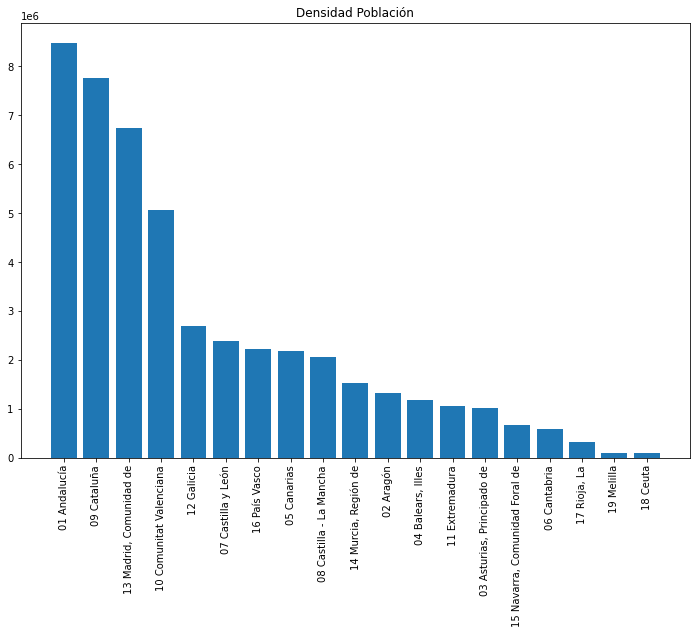

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(df2["Comunidades y Ciudades Autónomas"], df2["Total"])
plt.title("Densidad Población")
plt.xticks(rotation = 90);